## Работу выполнила студентка группы 381803-1 Журилова Анастасия

In [1]:
 # Массивы (матрицы, векторы, линейная алгебра)
import numpy as np

# Научная графика
import matplotlib.pyplot as plt

# Таблицы и временные ряды (dataframe, series)
import pandas as pd

 # Еще больше красивой графики для визуализации данных
import seaborn as sns

 # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
%matplotlib inline

## 0. Описание задачи (постановка)
В банке произошло снижение доходов. После анализа данной ситуации эксперты пришли к выводу, что основная причина заключается в том, что клиенты банка недостаточно инвестировали для долгосрочных депозитов. Соответсвенно, цель задачи: выявить существующих клиентов, у которых больше шансов оформить подписку на долгосрочный депозит, и сосредоточить маркетинговые усилия на таких клиентах.
Т.е. цель классификации состоит в том, чтобы предсказать, подпишется ли клиент (да/нет) на срочный депозит (переменная y).
Набор данных содержит обучающие и тестовые данные. 

## 1.Прочитать данные

Выведем таблицу с данным и проанализируем имеющиеся признаки.

In [2]:
data = pd.read_csv('new_train.csv')

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


Таблица содержит данные о более 30 тысяч клиентов банка. Для каждого клиента указаны значения некоторых признаков.

Посмотрим на размеры таблицы.

In [4]:
data.shape

(32950, 16)

А таперь на все колонки = признаки.

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### Всего имеется 16 признаков:

- **age** - возраст клиента
- **job** -	вид работы клиента
- **marital** -	семейное положение	
- **education** - образование клиента	
- **default** -	наличие кредина у клиента (да, нет, неизвестно)	
- **housing** -	наличие жилищного кредита (да, нет, неизвестно)
- **loan** - наличие заёмов
- **contact** -	тип контактной связи
- **month** - последний месяц, когда связывались с клиентом
- **dayofweek** - последний день недели, когда связывались с клиентом
- **duration** - продолжительность последнего контакта, в секундах.(Важное примечание: этот атрибут сильно влияет на конечный результат (например, если длительность =0, то y= "нет"))
- **campaign** -количество контактов, осуществленных в ходе данной кампании и для данного клиента (включая последний контакт)
- **pdays** - количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (999 означает, что с клиентом ранее не связывались)		
- **previous** - количество контактов, совершенных до этой кампании и для этого клиента
- **poutcome** - результат предыдущей маркетинговой кампании ("неудача", "несуществующий", "успех")
- **y** - оформил ли клиент срочный депозит? ("да", "нет")

Выведем тип данных всех столбцов, представленных в таблице:

In [6]:
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

Видим, что 11 признаков имеют тип данных "Object". Заменим тип на специальный, предназначенный для хранения категориальных значений, а также изменим тип данных для бинарных признаков:

In [7]:
data["job"] = data["job"].astype('category')
data["marital"] = data["marital"].astype('category')
data["education"] = data["education"].astype('category')
data["default"] = data["default"].astype('category')
data["housing"] = data["housing"].astype('category')
data["loan"] = data["loan"].astype('category')
data["contact"] = data["contact"].astype('category')
data["month"] = data["month"].astype('category')
data["day_of_week"] = data["day_of_week"].astype('category')
data["poutcome"] = data["poutcome"].astype('category')

#Превратим y в 1, если "да", в 0 если "нет"
if type(data.y.iloc[0]) == str:
    data['y'] = data['y'].apply(lambda x: 1 if x == "yes" else (0 if x == "no" else np.na))

In [8]:
data["job"].dtype, data["marital"].dtype, data["education"].dtype, data["default"].dtype, data["housing"].dtype, data["loan"].dtype, data["month"].dtype, data["day_of_week"].dtype, data["poutcome"].dtype, data["y"].dtype

(CategoricalDtype(categories=['admin.', 'blue-collar', 'entrepreneur', 'housemaid',
                   'management', 'retired', 'self-employed', 'services',
                   'student', 'technician', 'unemployed', 'unknown'],
 , ordered=False),
 CategoricalDtype(categories=['divorced', 'married', 'single', 'unknown'], ordered=False),
 CategoricalDtype(categories=['basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                   'illiterate', 'professional.course', 'university.degree',
                   'unknown'],
 , ordered=False),
 CategoricalDtype(categories=['no', 'unknown', 'yes'], ordered=False),
 CategoricalDtype(categories=['no', 'unknown', 'yes'], ordered=False),
 CategoricalDtype(categories=['no', 'unknown', 'yes'], ordered=False),
 CategoricalDtype(categories=['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov',
                   'oct', 'sep'],
 , ordered=False),
 CategoricalDtype(categories=['fri', 'mon', 'thu', 'tue', 'wed'], ordered=False),
 CategoricalDtype(cat

## 2. Визуализация данных

Получим визуализацию наших данных, а так же сводную информацию о количественных признаках. Найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей:

In [9]:
des = data.describe()
des
#data.describe()

,age,duration,campaign,pdays,previous,y
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719,0.112656
std,10.403636,258.975917,2.752326,187.951096,0.499025,0.316176
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.000000


Учитывая данные таблицы, можно сделать несколько выводов:
большинство клиентов банка редко выходили на связь или вообще не имели контактов с банком, так же большинство клиентов  - это люди среднего возраста и продолжительность контакта (т.е. разговора с банком, если он и был) не превышает 5-10 минут. При чем до этого с этими клиентами в большинстве своём вообще не связывались.

При этом, максимальное время разговора составляет примерно 81 минуту, а максимальное количесвто звонков клиенту достигает 56.

Получим информацию о категориальных признаках:

In [10]:
des2=data.describe(include=['category'])
des2

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416


В результате можно заметить, что почти 20 тысяч человек из 33 тысяч находятся в браке, 26 тысяч человек не имеют основных кредитов, но 17254 человека выплачивают кредит за жилпрощадь.
А так же 28416 человек вообще не принимали участие в предыдущей компании.

Для количественных и бинарных признаков построим матрицу корреляции:

In [11]:
data_corr = data.corr()
data_corr

,age,duration,campaign,pdays,previous,y
age,1.000000,-0.001841,0.003302,-0.032011,0.020670,0.028673
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538,0.400752
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051,-0.065462
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601,-0.325539
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000,0.229759
y,0.028673,0.400752,-0.065462,-0.325539,0.229759,1.000000


Видим, что наиболее коррелирующие с признаком "y" являются признаки "duration", "pdays", "previous". Причем  "pdays"коррелируeт со знаком минус, что говорит о том, на большинстве объектов пара признаков отклоняется от своих средних в разные стороны. 

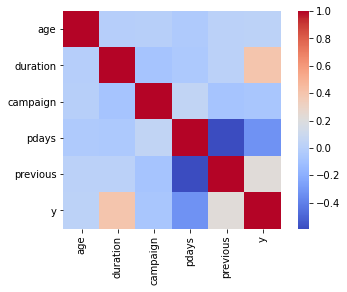

In [12]:
sns.heatmap(data_corr , square=True, cmap='coolwarm')
pass

Из полученных данных видим, что признаки не коррелируют между собой.

In [ ]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], hue="education", diag_kind="hist")
pass

<AxesSubplot:xlabel='age', ylabel='y'>

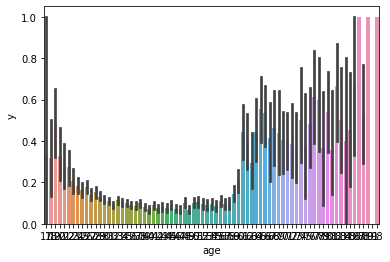

In [13]:
sns.barplot(data=data, x="age", y="y")

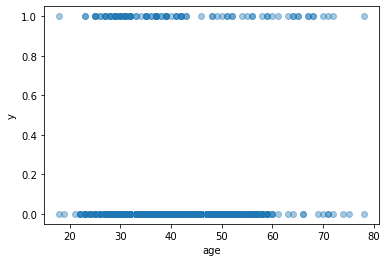

In [14]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['age'], data.iloc[random_subset]['y'], alpha=0.4)
plt.xlabel('age')
plt.ylabel('y')
pass

<AxesSubplot:xlabel='marital', ylabel='y'>

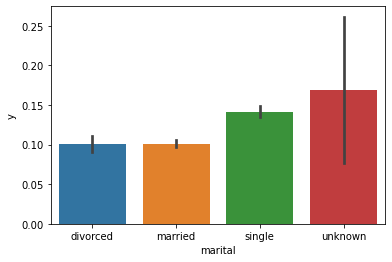

In [15]:
sns.barplot(data=data, y="y", x="marital")

<AxesSubplot:xlabel='y', ylabel='education'>

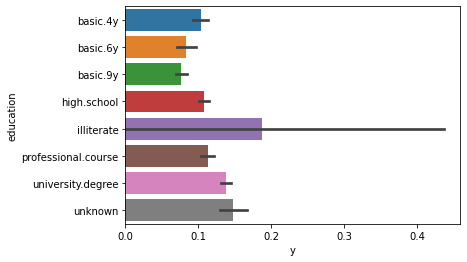

In [16]:
sns.barplot(data=data, x="y", y="education")

<AxesSubplot:xlabel='y', ylabel='job'>

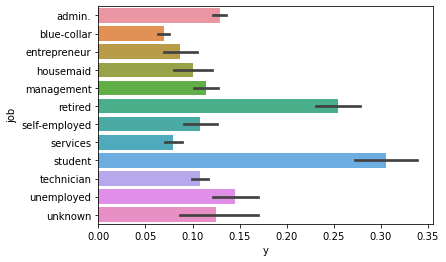

In [17]:
sns.barplot(data=data, x="y", y="job")

<AxesSubplot:xlabel='default', ylabel='y'>

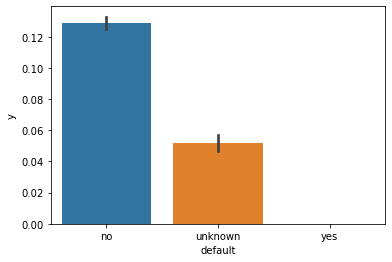

In [18]:
sns.barplot(data=data, y="y", x="default")

<AxesSubplot:xlabel='housing', ylabel='y'>

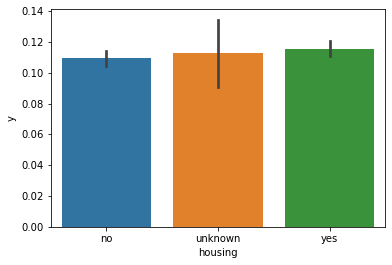

In [19]:
sns.barplot(data=data, y="y", x="housing")

<AxesSubplot:xlabel='loan', ylabel='y'>

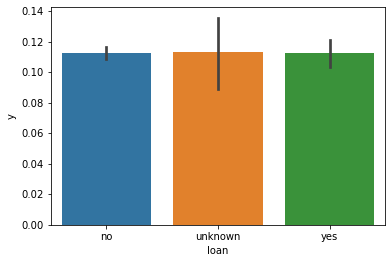

In [20]:
sns.barplot(data=data, y="y", x="loan")

<AxesSubplot:xlabel='contact', ylabel='y'>

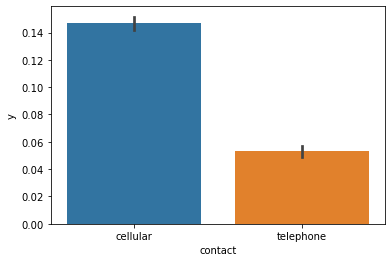

In [21]:
sns.barplot(data=data, y="y", x="contact")

Из визуализации данных можно предположить, что на срочный депозит в банке чаще и вероятнее всего соглашаются: люди в возрасте, примерно от 25 до 45 лет, одинокие и, к сожалению, без образования (т.е. неграмотные).
Так же на срочные депозиты чаще остальных соглашаются студенты и люди, не имеющие кредитов (что логично). А вот наличие кредитов на жильё или личных займов практически никак не влияют на это решение. 

## 3. Обработка пропущщенных значений

In [22]:
data.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Пропущенных значений нет

## 4. Обработка категориальных признаков
Для дальнейшей обработки данных закодируем категориальные признаки с помощью числовых.

Бинарные признаки "y"" заменим на числовой (0 и 1). К небинарным признакам "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "previous" применим метод бинаризации (one-hot encoding).

In [23]:
data['y'] = pd.factorize(data['y'])[0]

job_dummies = pd.get_dummies(data['job'])
marital_dummies = pd.get_dummies(data['marital'])
education_dummies = pd.get_dummies(data['education'])
default_dummies = pd.get_dummies(data['default'])
housing_dummies = pd.get_dummies(data['housing'])
loan_dummies = pd.get_dummies(data['loan'])
contact_dummies = pd.get_dummies(data['contact'])
month_dummies = pd.get_dummies(data['month'])
day_of_week_dummies = pd.get_dummies(data['day_of_week'])
previous_dummies = pd.get_dummies(data['previous'])
poutcome_dummies = pd.get_dummies(data['poutcome'])

job_dummies.head()


,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


Добавим dummy-столбцы к таблице и удалим "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "previous":

In [24]:
data = pd.concat((data, job_dummies), axis=1)
data = pd.concat((data, marital_dummies), axis=1)
data = pd.concat((data, education_dummies), axis=1)
data = pd.concat((data, default_dummies), axis=1)
data = pd.concat((data, housing_dummies), axis=1)
data = pd.concat((data, loan_dummies), axis=1)
data = pd.concat((data, contact_dummies), axis=1)
data = pd.concat((data, month_dummies), axis=1)
data = pd.concat((data, day_of_week_dummies), axis=1)
data = pd.concat((data, previous_dummies), axis=1)
data = pd.concat((data, poutcome_dummies), axis=1)

data = data.drop(['job'], axis=1)
data = data.drop(['marital'], axis=1)
data = data.drop(['education'], axis=1)
data = data.drop(['default'], axis=1)
data = data.drop(['housing'], axis=1)
data = data.drop(['loan'], axis=1)
data = data.drop(['contact'], axis=1)
data = data.drop(['month'], axis=1)
data = data.drop(['day_of_week'], axis=1)
data = data.drop(['previous'], axis=1)
data = data.drop(['poutcome'], axis=1)

data.head()

,age,duration,campaign,pdays,y,admin.,blue-collar,entrepreneur,housemaid,management,...,1,2,3,4,5,6,7,failure,nonexistent,success
0,49,227,4,999,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,37,202,2,999,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,78,1148,1,999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,36,120,2,999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 5. Нормализация признаков
Нормализация (normalization) и стандартизация (standardization) являются методами изменения диапазонов значений – шкалирования. Разные атрибуты могут измеряться в разных диапазонах, или значения одного атрибута варьируются слишком сильно. Например, один атрибут может имеет диапазон от 0 до 1, а второй — от 1 до 1000. Тогда второй атрибут оказывает большее влияние на обучение, хотя не факт, что он является более важным, чем первый.

Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения,

Стандартизация изменяет форму распределения данных (приводится к нормальному распределению).

В дальнейшем мы будем использовать алгоритм k ближайших соседей, основанный на измерении расстояний, в таких случаях лучше применять стандартизацию. Выполним стандартизацию всех признаков:

In [25]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand

,age,duration,campaign,pdays,y,admin.,blue-collar,entrepreneur,housemaid,management,...,1,2,3,4,5,6,7,failure,nonexistent,success
0,0.863726,-0.120194,0.522973,0.196581,-0.356306,-0.580916,1.851503,-0.191019,-0.163214,-0.276802,...,-0.354194,-0.136878,-0.07307,-0.042711,-0.020617,-0.012319,-0.005509,-0.340809,0.399441,-0.186275
1,-0.289717,-0.216729,-0.203685,0.196581,-0.356306,-0.580916,-0.540085,5.234916,-0.163214,-0.276802,...,2.823230,-0.136878,-0.07307,-0.042711,-0.020617,-0.012319,-0.005509,2.934102,-2.503422,-0.186275
2,3.651213,3.436121,-0.567014,0.196581,2.806488,-0.580916,-0.540085,-0.191019,-0.163214,-0.276802,...,-0.354194,-0.136878,-0.07307,-0.042711,-0.020617,-0.012319,-0.005509,-0.340809,0.399441,-0.186275
3,-0.385837,-0.533360,-0.203685,0.196581,-0.356306,1.721367,-0.540085,-0.191019,-0.163214,-0.276802,...,-0.354194,-0.136878,-0.07307,-0.042711,-0.020617,-0.012319,-0.005509,-0.340809,0.399441,-0.186275
4,1.824928,0.424258,-0.203685,0.196581,-0.356306,-0.580916,-0.540085,-0.191019,-0.163214,-0.276802,...,-0.354194,-0.136878,-0.07307,-0.042711,-0.020617,-0.012319,-0.005509,-0.340809,0.399441,-0.186275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-1.154799,-0.255342,-0.567014,0.196581,-0.356306,-0.580916,-0.540085,-0.191019,-0.163214,-0.276802,...,-0.354194,-0.136878,-0.07307,-0.042711,-0.020617,-0.012319,-0.005509,-0.340809,0.399441,-0.186275
32946,1.152086,-0.749597,-0.567014,0.196581,-0.356306,-0.580916,-0.540085,-0.191019,-0.163214,-0.276802,...,2.823230,-0.136878,-0.07307,-0.042711,-0.020617,-0.012319,-0.005509,2.934102,-2.503422,-0.186275
32947,1.344327,-0.490885,0.522973,0.196581,-0.356306,1.721367,-0.540085,-0.191019,-0.163214,-0.276802,...,-0.354194,-0.136878,-0.07307,-0.042711,-0.020617,-0.012319,-0.005509,-0.340809,0.399441,-0.186275
32948,-1.058679,-0.359599,-0.567014,0.196581,-0.356306,1.721367,-0.540085,-0.191019,-0.163214,-0.276802,...,-0.354194,-0.136878,-0.07307,-0.042711,-0.020617,-0.012319,-0.005509,-0.340809,0.399441,-0.186275


## 6. Разбивка данных на тестовую и обучающие выборки

Для определения рисков наступления страхового случая будем использовать все входные признаки:

In [26]:
X = data_stand.drop(["y"], axis=1)
y = data["y"]

Разобьем данные на обучающую и тестовую выборку в пропорции 3:1 (75% обучающей выборки, 25% - тестовой)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((24712, 65), (8238, 65))

## 7. Классификатор ближайших соседей


Проведем обучение с помощью k-nearest neighbors algorithm (k-NN) и вычислим ошибки на обучающей выборке и тестовой:

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [29]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.08607154418905795, 0.10706482155863073)

## 8. Другие классификаторы


In [30]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.055236322434444804 0.09456178684146638


In [31]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.09044189057947556 0.09711094925952901


## 9. Итоги

В результа данной работы, было реализовано обучение модели, предсказывающей решение клиентов банка, а именно способность взять срочный депозит. Обучение проводилось с помощью метода k ближайших соседей (дополнительно использовались методы gbt и ada). 
 
 В случае с методом k ближайших соседей, при подборе оптимальных параметров метода и предварительной обработки данных, был получен процент ошибок на обучающей выборке: 8.6%, на тестовой выборке: 10.7%. Т.к. в случае с клиентом банка, его решение обусловлено не только данными, приведенными в таблице, но и многими другими факторами (напрмер, текущей ситуацией с финансами, даже настроением и, к примеру, мнением окружающих его людей), то предсказание положительного результата, становится если и не невозможным, то крайне сложным, что и обуславливает пусть и не очень большой, но всё же в пределах 10-15% ошибок.   
 
Кроме того, можно предположить, что при составлении таблицы авторы учли не все влияющие на исход признаки. 
Возможное улучшение результатов: применение другого метода обучения модели. К примеру, меод gbt показал себя чуть лучше, чем метод ближайших соседей, а вот метод ada, наоборот, показал ухудшение (т.е. увеличение) процента ошибок на обучающей выборке и небольшое улучшение на тестовой.

## Обучение нейронной сети

Подключим специальные библиотеки:

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Проведем обучение нескольких моделей, отличающихся друг от друга параметрами alpha и количеством нейронов на скрытом слое.
Использовать будем одни и те же данные, количество скрытых слоёв так же менять не будет, оно равно 2.
Для каждой модели будем считать ошибку и точность и на тестовой и на обучающей выборке.

In [33]:
#Ошибки
trainError = []
testError = []

#Точность
trainCorrect = []
testCorrect = []

#Массив параметров alpha
alphaArr = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
#Количество нейронов на скрытом слое
NArr = [1, 3, 5, 10, 20, 50, 70, 100, 150, 200, 250, 300]

Train_accuracy = pd.DataFrame(0., index = alphaArr, columns = NArr)
Test_accuracy = pd.DataFrame(0., index = alphaArr, columns = NArr)

Train_error = pd.DataFrame(0., index = alphaArr, columns = NArr)
Test_error = pd.DataFrame(0., index = alphaArr, columns = NArr)

for n in NArr :
  for alpha in alphaArr :

    print(n, alpha)

    mlp_model = MLPClassifier(hidden_layer_sizes = (n,2),
                              solver = 'lbfgs', 
                              activation = 'logistic',
                              random_state = 42,
                              alpha = alpha)

    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict  = mlp_model.predict(X_test)

    Train_error[n][alpha] = np.mean(y_train != y_train_predict)
    Test_error[n][alpha] = np.mean(y_test != y_test_predict)
    Train_accuracy[n][alpha] = accuracy_score(y_train, y_train_predict)
    Test_accuracy[n][alpha] = accuracy_score(y_test, y_test_predict)

1 0.0001
1 0.001
1 0.01
1 0.1
1 0.5
1 1
1 5
1 10
1 50
1 100
3 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.5
3 1
3 5
3 10
3 50
3 100
5 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 5
5 10
5 50
5 100
10 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 10
10 50
10 100
20 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 10


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 50
20 100
50 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 10


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 50
50 100
70 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 10


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 50
70 100
100 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 10


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 50
100 100
150 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 10


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 50
150 100
200 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 10


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 50
200 100
250 0.0001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.001


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.01


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 1


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 5


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 10


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 50
250 100
300 0.0001
300 0.001
300 0.01
300 0.1
300 0.5
300 1
300 5
300 10
300 50
300 100


Теперь построим графики ошибок и точностей, которые мы получили.

Каждый график представляет собой вывод значений в зависимоти от парметров. На пересечии параметров находятся ячейки, которые закрашиваются в определенный цвет. 

Соответственно чем светлее цвет(в графиках ошибок) или желтее(в графиках точности), тем лучше полученное значение.
Так же в ячейке с лучшим результатом написано соответсвующее значение ошибки или точности.

In [38]:
#Где максимальная точность
M1 = Test_accuracy.values.max()
M2 = Train_accuracy.values.max()
#Где минимальная ошибка
M3 = Test_error.values.min()
M4 = Train_error.values.min()

Mask = ((Test_accuracy == M1) | (Train_accuracy == M2) | (Test_error == M3) | (Train_error == M4))

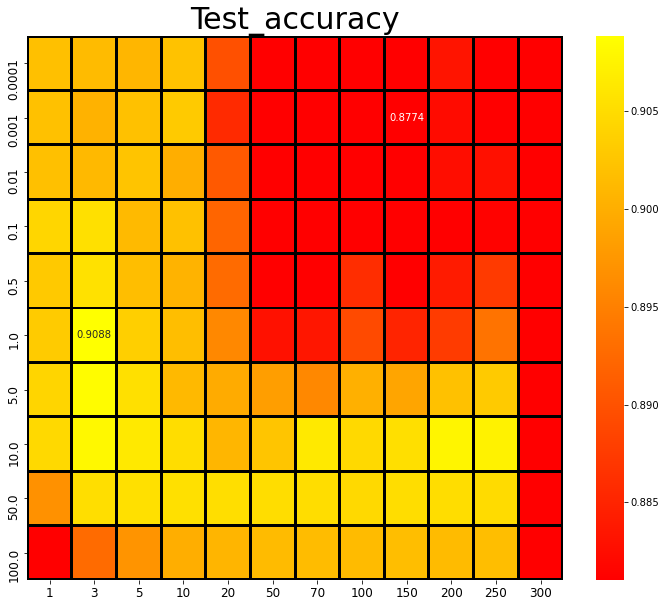

In [50]:
#строим графики для наглядности
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Test_accuracy, annot = round(Test_accuracy[Mask], 4).fillna(''),
            cmap = 'autumn', fmt='', linewidths=2, linecolor='black',
            vmin = Test_accuracy.quantile(0.9).min())
plt.title('Test_accuracy', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

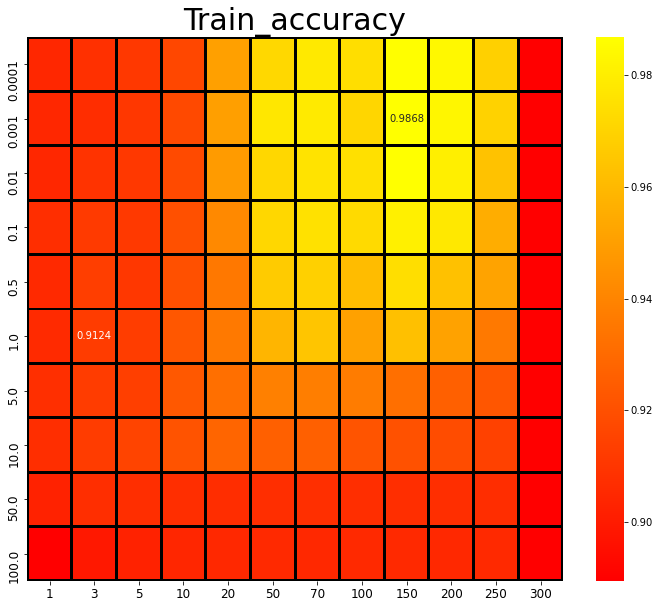

In [51]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Train_accuracy, annot = round(Train_accuracy[Mask], 4).fillna(''),
            cmap = 'autumn', fmt='', linewidths=2, linecolor='black',
            vmin = Train_accuracy.quantile(0.9).min())
plt.title('Train_accuracy', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

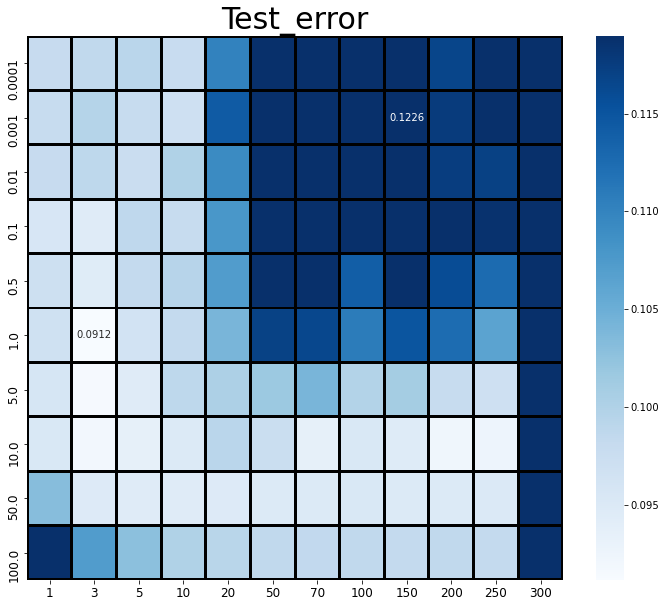

In [52]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Test_error, annot = round(Test_error[Mask], 4).fillna(''),
            cmap = 'Blues', fmt='', linewidths=2, linecolor='black',
            vmax = Test_error.quantile(0.05).max())
plt.title('Test_error', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

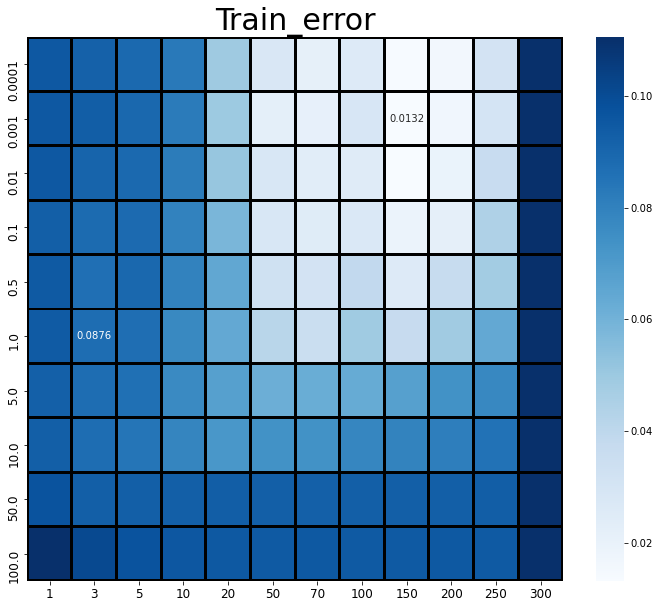

In [53]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Train_error, annot = round(Train_error[Mask], 4).fillna(''),
            cmap = 'Blues', fmt='', linewidths=2, linecolor='black',
            vmax = Train_error.quantile(0.05).max())
plt.title('Train_error', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Из приведённых выше графиков можно сделать вывод, что наиболее лучшимии вариантами получились пары параметров:

1) alpha = 1.0, N = 3 

2) alpha = 0.001, N = 150

Еще раз обучим две модели при таких параметрах и проанализируем результаты:

Сначала (1)alpha = 1, N = 3

In [55]:
mlp_model = MLPClassifier(hidden_layer_sizes = (3,2),
                              solver = 'lbfgs', 
                              activation = 'logistic',
                              random_state = 42,
                              alpha = 1.0)

mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

In [56]:
#Выведем результаты
print(f'Train error     =  {np.mean(y_train != y_train_predict)}')
print(f'Test error      =  {np.mean(y_test != y_test_predict)}')
print(f'Train accuracy  =  {accuracy_score(y_train, y_train_predict)}')
print(f'Test accuracy   =  {accuracy_score(y_test, y_test_predict)}')

Train error     =  0.08760925865976044
Test error      =  0.09116290361738286
Train accuracy  =  0.9123907413402396
Test accuracy   =  0.9088370963826171


Из выше выведенных параметров видим, что алгоритм справляется примерно одинаково и на тестовой и на обучающей выборке, что свидетельствует об отсутсвии недообучения или переобучения.

Теперь посмотрим (2) alpha = 0.001, N = 150

In [57]:
mlp_model = MLPClassifier(hidden_layer_sizes = (150,2),
                              solver = 'lbfgs', 
                              activation = 'logistic',
                              random_state = 42,
                              alpha = 0.001)

mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [58]:
#Выведем результаты
print(f'Train error     =  {np.mean(y_train != y_train_predict)}')
print(f'Test error      =  {np.mean(y_test != y_test_predict)}')
print(f'Train accuracy  =  {accuracy_score(y_train, y_train_predict)}')
print(f'Test accuracy   =  {accuracy_score(y_test, y_test_predict)}')

Train error     =  0.013151505341534477
Test error      =  0.12260257344015538
Train accuracy  =  0.9868484946584655
Test accuracy   =  0.8773974265598447


Для данной модели наблюдаем, что ошибка на тестовой выборке незначительно, но всё же больше, чем на обучающей, однако, в случае точности ситуация диаметрально противоположная. 

Получается, что для данной модели наблюдается похожая ситуация, что и для предыдущей модели.

### Выводы:

В ходе данной работы было проведено обучение модели нейронной сети с двумя скрытыми слоями.

При этом был использован целый ряд значений параметра alpha и так же различное количество нейронов на слое, что позволило определить наилучшие варианты среди достаточного количесва примеров.

Были определены два наилучших варианта сочетаний:

1) alpha = 1.0, N = 3 

2) alpha = 0.001, N = 150

Обе эти модели показывают довольно хорошие результаты, близкие друг к другу.

Относительно метода KNN нейронные сети показали немного лучший результат. 